## Predicting the sale price of House Using machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of House.

## 1. Problem defition
            How well can we predict sale price of a House, given its characteristics .
   
## 2. Data 
        The data is downloaded from the Kaggle House Prices - Advanced Regression Techniques: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview
      There are 2 main datasets:

    * Train.csv is the training set

    * Test.csv is the test set

## 3. Evaluation
    The evaluation metric for this competition is the  Root-Mean-Squared-Error (RMSE)  between the actual and predicted auction prices.

    For more on the evaluation of this project check: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/evaluation

    Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSE.
    
## 4. Features
Data fields
    Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
          SaleCondition: Condition of sale

In [2]:
# Data manipulation tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sckit learn tools
import sklearn
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("train.csv")


In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
# df.corr()["SalePrice"]
# columns = list(train.corr()["SalePrice"][train.corr()["SalePrice"]>0].index)

In [11]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

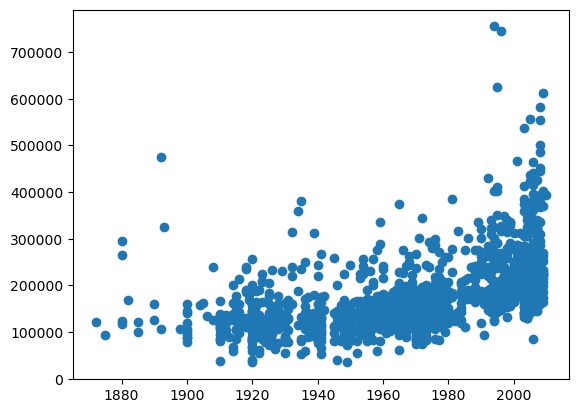

In [13]:
fig,ax= plt.subplots()
ax.scatter(df["YearBuilt"],df["SalePrice"]);

<Axes: ylabel='Frequency'>

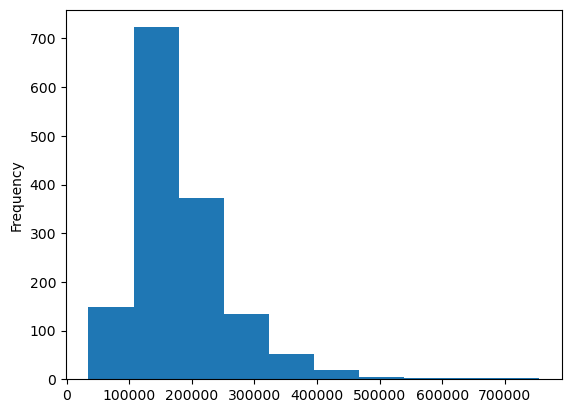

In [14]:
df.SalePrice.plot.hist()

## Convert string to categories
One way we can turn all of our data into numbers is by converting them into pandas catgories.

We can check the different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [16]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
MoSold,2,5,9,2,12
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


In [17]:
# Find the columns which contain strings
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
Heating
HeatingQC
CentralAir
KitchenQual
Functional
PavedDrive
SaleType
SaleCondition


In [18]:
# This will turn all of the string value into category value
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label]=content.astype("category").cat.as_ordered()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [21]:
df.LotShape.cat.categories

Index(['IR1', 'IR2', 'IR3', 'Reg'], dtype='object')

In [22]:
df.LotShape.cat.codes

0       3
1       3
2       0
3       0
4       0
       ..
1455    3
1456    3
1457    3
1458    3
1459    3
Length: 1460, dtype: int8

In [23]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## Fill missing values
Fill numerical missing values first https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Categorical.html

In [25]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [26]:
# Check for which numeric columns have null values
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [27]:
# Fill numeric rows with the median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df[label] = content.fillna(content.median())

## FiLLing and tunning Categorical variables into number
Now we've filled the numeric values, we'll do the same with the categorical values at the same time as turning them into numbers.

In [29]:
# Check columns which *aren't* numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [30]:
pd.Categorical(df["Fence"]).codes

array([-1, -1, -1, ...,  0, -1, -1], dtype=int8)

In [31]:
# Turn categorical variables into number
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate nwhether sample had misssing value
        df[label+"_is_missing"]=pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df[label]=pd.Categorical(content).codes+1   

In [32]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1,60,4,65.0,8450,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False


## Model selection

In [33]:
%%time

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)
# Fit the model
model.fit(df.drop("SalePrice", axis=1), df.SalePrice)

CPU times: total: 5.81 s
Wall time: 642 ms


RandomForestRegressor(n_jobs=-1, random_state=42)

In [34]:
model.score(df.drop("SalePrice", axis=1), df.SalePrice)

0.9804677786087354

In [37]:
df.drop("Id",axis=1,inplace = True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,60,4,65.0,8450,2,0,4,4,1,5,...,False,False,False,False,False,True,True,True,False,False
1,20,4,80.0,9600,2,0,4,4,1,3,...,False,False,False,False,False,True,True,True,False,False
2,60,4,68.0,11250,2,0,1,4,1,5,...,False,False,False,False,False,True,True,True,False,False
3,70,4,60.0,9550,2,0,1,4,1,1,...,False,False,False,False,False,True,True,True,False,False
4,60,4,84.0,14260,2,0,1,4,1,3,...,False,False,False,False,False,True,True,True,False,False


In [38]:
x = df.drop("SalePrice", axis=1);
y = df["SalePrice"];

In [99]:
to_check=df.drop("SalePrice", axis=1);

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,
                                              y,
                                              test_size=0.2,random_state = 42
                                              )

In [136]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
#Fit
GBR.fit(x_train, y_train)
GBR.score(x_val,y_val)

0.9048706859473532

In [ ]:
# Huper tunnig
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(GradientBoostingRegressor(),parameters,cv=5,verbose=True)
cv.fit(x_train,y_train)

## Preprocessing the data
Our model has been trained on data formatted in the same way as the training data.

This means in order to make predictions on the test data, we need to take the same steps we used to preprocess the training data to preprocess the test data.

Remember: Whatever you do to the training data, you have to do to the test data.

Let's create a function for doing so (by copying the preprocessing steps we used above)

In [103]:
def preprocess_data(df):

    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [104]:
df_test=pd.read_csv("test.csv")

In [105]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [106]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [107]:
# This will turn all of the string value into category value
for label,content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label]=content.astype("category").cat.as_ordered()

In [108]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
df_test = preprocess_data(df_test)

In [110]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageCars_is_missing,GarageArea_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,False,True,True,False,False,False
2,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
3,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,False,True,True,True,False,False


In [111]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,60,4,65.0,8450,2,0,4,4,1,5,...,False,False,False,False,False,True,True,True,False,False
1,20,4,80.0,9600,2,0,4,4,1,3,...,False,False,False,False,False,True,True,True,False,False
2,60,4,68.0,11250,2,0,1,4,1,5,...,False,False,False,False,False,True,True,True,False,False
3,70,4,60.0,9550,2,0,1,4,1,1,...,False,False,False,False,False,True,True,True,False,False
4,60,4,84.0,14260,2,0,1,4,1,3,...,False,False,False,False,False,True,True,True,False,False


In [112]:
# We can find how the columns differ using sets
set(df_test.columns)-set(df.columns)

{'BsmtFinSF1_is_missing',
 'BsmtFinSF2_is_missing',
 'BsmtFullBath_is_missing',
 'BsmtHalfBath_is_missing',
 'BsmtUnfSF_is_missing',
 'GarageArea_is_missing',
 'GarageCars_is_missing',
 'Id',
 'TotalBsmtSF_is_missing'}

In [113]:
df_test.drop("BsmtFinSF1_is_missing",
            axis=1,inplace=True)

In [114]:
df_test.drop("BsmtFinSF2_is_missing",axis=1,inplace=True)
df_test.drop("BsmtFullBath_is_missing",axis=1,inplace=True)
df_test.drop("BsmtHalfBath_is_missing",axis=1,inplace=True)
df_test.drop("BsmtUnfSF_is_missing",axis=1,inplace=True)

In [115]:
df_test.drop("GarageArea_is_missing",axis=1,inplace=True)
df_test.drop("GarageCars_is_missing",axis=1,inplace=True)
df_test.drop("TotalBsmtSF_is_missing",axis=1,inplace=True)

In [116]:
set(df_test.columns)-set(df.columns)

{'Id'}

In [117]:
df1 = pd.DataFrame()
for i in to_check:
    df1[i]=df_test[i];

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)

In [123]:
test_preds = GBR.predict(df1)

In [124]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["Id"] = df_test["Id"]
df_preds["SalePrice"] = test_preds
df_preds

,Id,SalePrice
0,1461,132787.021730
1,1462,153198.245775
2,1463,187745.006737
3,1464,191663.065689
4,1465,190254.266910
...,...,...
1454,2915,79338.116878
1455,2916,79558.787003
1456,2917,166143.446264
1457,2918,127689.416906


In [125]:
# Export prediction data
df_preds.to_csv("test_predictions.csv", index=False)